# Dataset

In [12]:
import pandas as pd

In [13]:
dataset = pd.read_csv("D:\Qriocity\FoodGPT\Dataset\Reviews.csv")

In [14]:
dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [15]:
columns_to_drop = ['Id', 'ProductId', 'UserId' , 'ProfileName' , 'HelpfulnessNumerator', 'HelpfulnessDenominator' , 'Time']

In [16]:
df = dataset.drop(columns=columns_to_drop)

In [17]:
df.head()

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...


In [18]:
import pandas as pd


# Create a new column 'Sentiment' based on review scores
df['Sentiment'] = df['Score'].apply(lambda score: 'Positive' if score > 3 else ('Neutral' if score == 3 else 'Negative'))

# Save the updated dataset with the sentiment column
df.head()



,Score,Summary,Text,Sentiment
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,4,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,2,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,5,Great taffy,Great taffy at a great price. There was a wid...,Positive


In [20]:
# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Print the counts
print("Sentiment Counts:")
print(sentiment_counts)

Sentiment Counts:
Sentiment
Positive    443777
Negative     82037
Neutral      42640
Name: count, dtype: int64


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Feature extraction
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['Text'])
y = df['Sentiment']

In [24]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Training the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluating the classifier
y_pred = rf_classifier.predict(X_test)
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred))

Random Forest Classifier Report:
              precision    recall  f1-score   support

    Negative       0.88      0.63      0.73     16181
     Neutral       0.97      0.39      0.56      8485
    Positive       0.89      0.99      0.94     89025

    accuracy                           0.89    113691
   macro avg       0.91      0.67      0.74    113691
weighted avg       0.90      0.89      0.88    113691



In [26]:
from joblib import dump

# Save the trained model to a file
dump(rf_classifier, 'random_forest_classifier.joblib')


['random_forest_classifier.joblib']

In [32]:
!pip install mlxtend

  Using cached mlxtend-0.23.1-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.1-py3-none-any.whl (1.4 MB)


Accuracy: 0.8948377620040284
Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.63      0.73     16181
     Neutral       0.97      0.39      0.56      8485
    Positive       0.89      0.99      0.94     89025

    accuracy                           0.89    113691
   macro avg       0.91      0.67      0.74    113691
weighted avg       0.90      0.89      0.88    113691



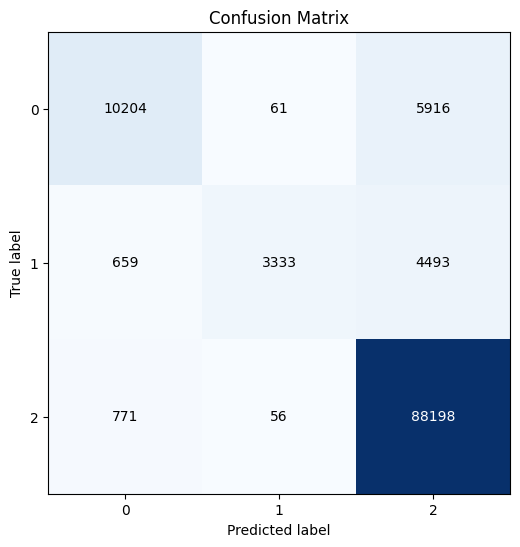

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Other metrics
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plot_confusion_matrix(conf_mat, figsize=(8, 6), cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [37]:
# Display one text with positive sentiment
positive_text = df[df['Sentiment'] == 'Positive'].iloc[0]['Text']
print("Text with positive sentiment:")
print(positive_text)

# Display one text with negative sentiment
negative_text = df[df['Sentiment'] == 'Negative'].iloc[0]['Text']
print("\nText with negative sentiment:")
print(negative_text)

# Display one text with neutral sentiment
neutral_text = df[df['Sentiment'] == 'Neutral'].iloc[0]['Text']
print("\nText with neutral sentiment:")
print(neutral_text)


Text with positive sentiment:
I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.

Text with negative sentiment:
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".

Text with neutral sentiment:
This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't buy it again.


In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Assuming you have loaded your DataFrame df and trained the classifier rf_classifier

# Example text input
text_input = "This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't buy it again."

# Preprocess the text input
X_new = tfidf_vectorizer.transform([text_input])

# Use the trained classifier to make predictions
predicted_label = rf_classifier.predict(X_new)

print("Predicted label:", predicted_label)


Predicted label: ['Neutral']


# Recommendation

In [28]:
import pandas as pd
df = pd.read_csv(r"C:\Users\shubh\Downloads\archive (8)\zomato_dataset.csv")

In [29]:
df.head()

,Restaurant Name,Rating,Cuisine,Average Price,Average Delivery Time,Safety Measure,Location
0,Campus Bakers,4.3,"Bakery, Fast Food, Pizza, Sandwich, Burger",₹50 for one,36 min,Restaurant partner follows WHO protocol,Agra
1,Mama Chicken Mama Franky House,4,"North Indian, Mughlai, Rolls, Burger, Momos",₹50 for one,22 min,Follows all Max Safety measures to ensure your...,Agra
2,GMB - Gopika Sweets & Restaurant,4.2,"North Indian, South Indian, Chinese, Fast Food...",₹50 for one,27 min,Follows all Max Safety measures to ensure your...,Agra
3,Shree Bankey Bihari Misthan Bhandar,4.2,"Mithai, Street Food, South Indian, Chinese, Ic...",₹50 for one,28 min,Restaurant partner follows WHO protocol,Agra
4,Burger King,4.2,"Burger, Fast Food, Beverages",₹50 for one,26 min,Follows all Max Safety measures to ensure your...,Agra


In [30]:
df.count()

Restaurant Name          44891
Rating                   44891
Cuisine                  44872
Average Price            44891
Average Delivery Time    44891
Safety Measure           44891
Location                 44891
dtype: int64

In [97]:
# Find unique elements in the "location" column
unique_locations = df['Location'].unique()

# Display the unique elements
print(unique_locations)

num_unique_locations = len(unique_locations)
print("Number of unique locations:", num_unique_locations)

['Agra' 'Ahmedabad' 'Ajmer' 'Alappuzha' 'Aligarh' 'Allahabad' 'Amravati'
 'Amritsar' 'Asansol' 'Aurangabad' 'Bangalore' 'Bareilly' 'Belgaum'
 'Bhavnagar' 'Bhopal' 'Bhubaneswar' 'Bikaner' 'Chandigarh' 'Chennai'
 'Coimbatore' 'Cuttack' 'Darbhanga' 'Darjeeling' 'Dehradun' 'Delhi NCR'
 'Dhanbad' 'Dharamshala' 'Durgapur' 'Firozabad' 'Gaya' 'Goa' 'Gonda'
 'Gorakhpur' 'Guntur' 'Guwahati' 'Haridwar' 'Hyderabad' 'Indore'
 'Jabalpur' 'Jaipur' 'Jalandhar' 'Jalgaon' 'Jammu' 'Jamnagar' 'Jamshedpur'
 'Jhansi' 'Jodhpur' 'Junagadh' 'Kanpur' 'Kharagpur' 'Kolhapur' 'Kolkata'
 'Kota' 'Lucknow' 'Ludhiana' 'Madurai' 'Manali' 'Mangalore' 'Manipal'
 'Meerut' 'Moradabad' 'Motihari' 'Mumbai' 'Mussoorie' 'Mysore' 'Nagpur'
 'Nainital' 'Nashik' 'NCR' 'Nellore' 'Palakkad' 'Patiala' 'Patna'
 'Puducherry' 'Pune' 'Raipur' 'Rajkot' 'Ranchi' 'Rishikesh' 'Saharanpur'
 'Salem' 'Sangli' 'Shimla' 'Siliguri' 'Solapur' 'Surat' 'Thrissur'
 'Tirunelveli' 'Trichy' 'Trivandrum' 'Udaipur' 'Ujjain' 'Vadodara'
 'Varanasi' 'Vellore'

In [27]:
columns_to_drop = ['Safety Measure']

df = df.drop(columns=columns_to_drop)

In [12]:
df.head()

,Restaurant Name,Rating,Cuisine,Average Price,Average Delivery Time,Location
0,Campus Bakers,4.3,"Bakery, Fast Food, Pizza, Sandwich, Burger",₹50 for one,36 min,Agra
1,Mama Chicken Mama Franky House,4,"North Indian, Mughlai, Rolls, Burger, Momos",₹50 for one,22 min,Agra
2,GMB - Gopika Sweets & Restaurant,4.2,"North Indian, South Indian, Chinese, Fast Food...",₹50 for one,27 min,Agra
3,Shree Bankey Bihari Misthan Bhandar,4.2,"Mithai, Street Food, South Indian, Chinese, Ic...",₹50 for one,28 min,Agra
4,Burger King,4.2,"Burger, Fast Food, Beverages",₹50 for one,26 min,Agra


In [13]:
# Check for missing values
print("Missing values before preprocessing:")
print(df.isnull().sum())

# Handle missing values (if any)
# For simplicity, let's drop rows with missing values
df.dropna(inplace=True)

# Standardize text data (if needed)
# For example, convert cuisine names to lowercase
df['Cuisine'] = df['Cuisine'].str.lower()

# Convert categorical variables into suitable format (if needed)
# No categorical variables in the provided sample, but you might want to encode them if present

# Check if preprocessing was successful
print("\nDataset after preprocessing:")
print(df.head())

Missing values before preprocessing:
Restaurant Name           0
Rating                    0
Cuisine                  19
Average Price             0
Average Delivery Time     0
Location                  0
dtype: int64

Dataset after preprocessing:
                       Restaurant Name Rating  \
0                        Campus Bakers    4.3   
1       Mama Chicken Mama Franky House      4   
2     GMB - Gopika Sweets & Restaurant    4.2   
3  Shree Bankey Bihari Misthan Bhandar    4.2   
4                          Burger King    4.2   

                                             Cuisine Average Price  \
0         bakery, fast food, pizza, sandwich, burger   ₹50 for one   
1        north indian, mughlai, rolls, burger, momos   ₹50 for one   
2  north indian, south indian, chinese, fast food...   ₹50 for one   
3  mithai, street food, south indian, chinese, ic...   ₹50 for one   
4                       burger, fast food, beverages   ₹50 for one   

  Average Delivery Time Location  
0

In [16]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...


True

In [73]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the Vader sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define thresholds for positive, negative, and neutral ratings
positive_threshold = 4.0
negative_threshold = 3.0

# Classify sentiment based on ratings
if 'Rating' in df.columns:
    # Calculate sentiment based on ratings
    df['Sentiment'] = df['Rating'].apply(lambda x: 1 if x >= positive_threshold else (-1 if x <= negative_threshold else 0))
    # Map sentiment labels
    df['Sentiment_Label'] = df['Sentiment'].map({1: 'Positive', -1: 'Negative', 0: 'Neutral'})
else:
    print("No rating data found in the dataset.")



In [74]:
df.head()

,Restaurant Name,Rating,Cuisine,Average Price,Average Delivery Time,Safety Measure,Location,Sentiment,Sentiment_Label
0,Campus Bakers,4.3,"Bakery, Fast Food, Pizza, Sandwich, Burger",₹50 for one,36 min,Restaurant partner follows WHO protocol,Agra,1,Positive
1,Mama Chicken Mama Franky House,4.0,"North Indian, Mughlai, Rolls, Burger, Momos",₹50 for one,22 min,Follows all Max Safety measures to ensure your...,Agra,1,Positive
2,GMB - Gopika Sweets & Restaurant,4.2,"North Indian, South Indian, Chinese, Fast Food...",₹50 for one,27 min,Follows all Max Safety measures to ensure your...,Agra,1,Positive
3,Shree Bankey Bihari Misthan Bhandar,4.2,"Mithai, Street Food, South Indian, Chinese, Ic...",₹50 for one,28 min,Restaurant partner follows WHO protocol,Agra,1,Positive
4,Burger King,4.2,"Burger, Fast Food, Beverages",₹50 for one,26 min,Follows all Max Safety measures to ensure your...,Agra,1,Positive


In [75]:
# Count sentiment values
sentiment_counts = df['Sentiment'].value_counts()

# Count label values
label_counts = df['Sentiment_Label'].value_counts()

print("Sentiment counts:")
print(sentiment_counts)
print("\nLabel counts:")
print(label_counts)


Sentiment counts:
Sentiment
 0    23235
 1    21022
-1      634
Name: count, dtype: int64

Label counts:
Sentiment_Label
Neutral     23235
Positive    21022
Negative      634
Name: count, dtype: int64


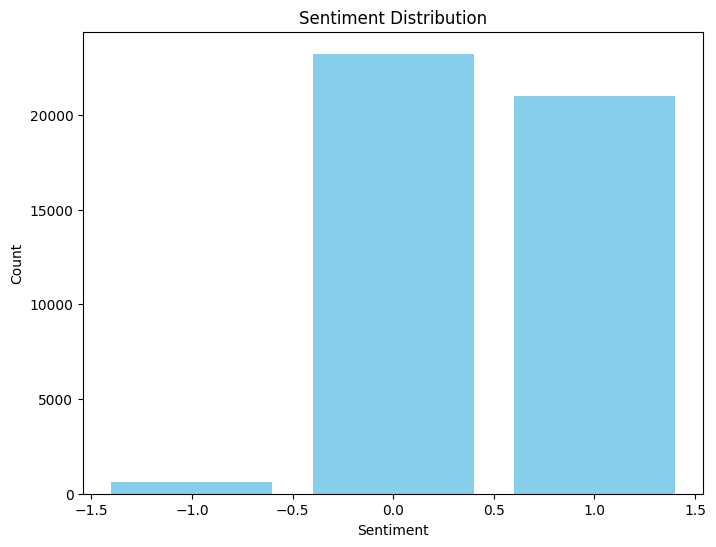

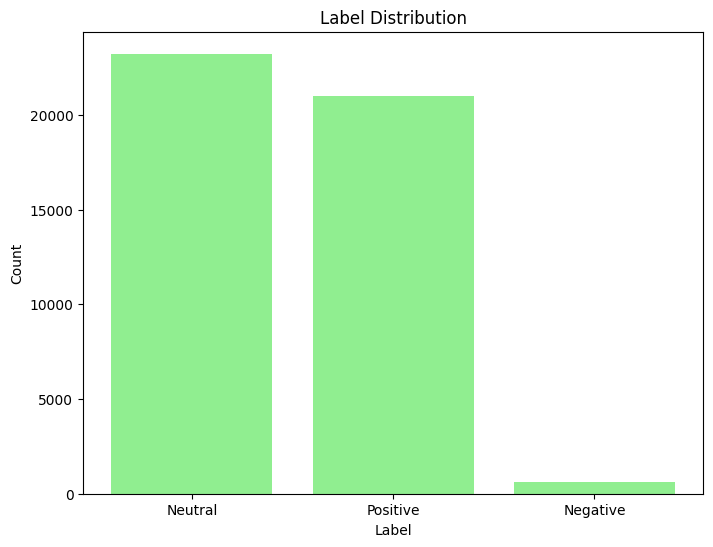

In [76]:
import matplotlib.pyplot as plt

# Plot sentiment counts
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Plot label counts
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values, color='lightgreen')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [77]:
# Extract relevant features
features = df[['Restaurant Name', 'Cuisine', 'Rating', 'Average Price', 'Location','Sentiment_Label']]

# Convert Cuisine column to one-hot encoding
cuisine_dummies = features['Cuisine'].str.get_dummies(sep=', ')

# Concatenate one-hot encoded cuisine types with other features
features = pd.concat([features.drop('Cuisine', axis=1), cuisine_dummies], axis=1)

# Display the updated features
print(features.head())

                       Restaurant Name  Rating Average Price Location  \
0                        Campus Bakers     4.3   ₹50 for one     Agra   
1       Mama Chicken Mama Franky House     4.0   ₹50 for one     Agra   
2     GMB - Gopika Sweets & Restaurant     4.2   ₹50 for one     Agra   
3  Shree Bankey Bihari Misthan Bhandar     4.2   ₹50 for one     Agra   
4                          Burger King     4.2   ₹50 for one     Agra   

  Sentiment_Label  Afghan  Afghani  African  American  Andhra  ...  Sushi  \
0        Positive       0        0        0         0       0  ...      0   
1        Positive       0        0        0         0       0  ...      0   
2        Positive       0        0        0         0       0  ...      0   
3        Positive       0        0        0         0       0  ...      0   
4        Positive       0        0        0         0       0  ...      0   

   Tamil  Tea  Tex-Mex  Thai  Tibetan  Turkish  Vietnamese  Waffle  Wraps  
0      0    0        0

In [78]:
# Extract cuisine types
cuisine_types = df['Cuisine'].str.split(', ')

# Print unique cuisine types
unique_cuisine_types = set(cuisine for cuisines in cuisine_types.dropna() for cuisine in cuisines)
print("Unique Cuisine Types:", unique_cuisine_types)

Unique Cuisine Types: {'', 'Sri Lankan', 'Assamese', 'Pancake', 'Bengali', 'Bangladeshi', 'Finger Food', 'Tea', 'Maharashtrian', 'Mughlai', 'Kashmiri', 'Biryani', 'Mediterranean', 'German', 'Hot dogs', 'Bohri', 'Brazilian', 'Beverages,', 'Mishti', 'Seafood', 'Bar Food', 'Kathiyawadi', 'Malwani', 'Greek', 'Hyderabadi', 'Arabian', 'Drinks Only', 'Rajasthani', 'Odia', 'Lebanese', 'Cafe', 'Street Food', 'Pasta', 'Tibetan', 'Turkish', 'Middle Eastern', 'Fast Food', 'North Eastern', 'Shake', 'Steak', 'Pizza', 'Juices', 'Chettinad', 'Continental', 'Bakery', 'Mithai', 'Kebab', 'Burmese', 'Desserts,', 'American', 'South Indian', 'Sandwich', 'Vietnamese', 'Paan', 'Cantonese', 'Andhra', 'Kerala', 'Spanish', 'Garhwali', 'Wraps', 'Healthy Food', 'Nepalese', 'Desserts', 'Korean', 'Japanese', 'Parsi', 'Cake', 'Indian', 'Bihari', 'Tex-Mex', 'Burger', 'Modern Indian', 'Waffle', 'Chinese', 'Afghani', 'Italian', 'Shawarma', 'Iranian', 'Konkan', 'French', 'Moroccan', 'Malaysian', 'Sindhi', 'African', 'Man

In [79]:
import pandas as pd

# Sample user preferences for cuisine types (you can replace this with actual user preferences)
user_preferences = ['Italian', 'Mexican', 'Chinese']

# Filter restaurants based on user preferences for cuisine types
preferred_restaurants = features[features[user_preferences].any(axis=1)]
a
# Sort preferred restaurants by average rating (assuming 'Rating' is the column name)
preferred_restaurants = preferred_restaurants.sort_values(by='Rating', ascending=False)
a
# Recommend top 5 restaurants to the user
top_recommendations = preferred_restaurants.head(5)

print("Top 5 recommended restaurants:")
print(top_recommendations[['Restaurant Name', 'Rating', 'Average Price', 'Location']])


Top 5 recommended restaurants:
                       Restaurant Name  Rating Average Price   Location
32964                    Rasoi Ghar Se     4.9  ₹100 for one   Palakkad
1918   JFC - Jagjeet Foods & Ice Cream     4.7  ₹200 for one    Aligarh
39164        Shree Sai Krupa Fast Food     4.7  ₹200 for one      Surat
23579                        Coffichat     4.6  ₹200 for one    Kolkata
4106                     Maven Kitchen     4.6  ₹100 for one  Bangalore


In [88]:
import pandas as pd

# Sample user preferences for cuisine types (you can replace this with actual user preferences)
user_preferences = ['Italian', 'Mexican', 'Chinese']

# Specify the city
city = 'Pune'  # Replace 'Agra' with the desired city

# Filter restaurants based on user preferences for cuisine types and city
preferred_restaurants = features[(features[user_preferences].any(axis=1)) & (features['Location'] == city)]

# Sort preferred restaurants by average rating (assuming 'Rating' is the column name)
preferred_restaurants = preferred_restaurants.sort_values(by='Rating', ascending=False)

# Recommend top 5 restaurants to the user
top_recommendations = preferred_restaurants.head(5)

print("Top 5 recommended restaurants in", city, ":")
print(top_recommendations[['Restaurant Name', 'Rating', 'Average Price', 'Location']])


Top 5 recommended restaurants in Pune :
                           Restaurant Name  Rating Average Price Location
34871  Govinda's Snacks Centre Camp ISKCON     4.6  ₹150 for one     Pune
34999                       Mainland China     4.5  ₹150 for one     Pune
35198             Kalinga Restaurant & Bar     4.5   ₹50 for one     Pune
34911  LeanCrust Pizza - ThinCrust Experts     4.5  ₹150 for one     Pune
35270                    Vakrantunda Modak     4.5  ₹100 for one     Pune


In [89]:
# Integrate sentiment analysis into recommendation system
# Assuming sentiment analysis results are available in the 'Sentiment_Label' column

# Filter preferred restaurants based on user preferences and positive sentiment
preferred_restaurants = preferred_restaurants[preferred_restaurants['Sentiment_Label'] == 'Negative']

# Sort preferred restaurants by average rating
preferred_restaurants = preferred_restaurants.sort_values(by='Rating', ascending=False)

# Recommend top 5 restaurants to the user
top_recommendations = preferred_restaurants.head(5)

print("Top 5 recommended restaurants with positive sentiment:")
print(top_recommendations[['Restaurant Name', 'Rating', 'Average Price', 'Location']])


Top 5 recommended restaurants with positive sentiment:
          Restaurant Name  Rating Average Price Location
35053  The Galaxy Chinese     3.0  ₹300 for one     Pune


In [90]:
# Save the updated features DataFrame to a CSV file
features.to_csv("updated_features.csv", index=False)


In [91]:
final_csv = pd.read_csv("updated_features.csv")

In [92]:
final_csv.head()

,Restaurant Name,Rating,Average Price,Location,Sentiment_Label,Afghan,Afghani,African,American,Andhra,...,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vietnamese,Waffle,Wraps
0,Campus Bakers,4.3,₹50 for one,Agra,Positive,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mama Chicken Mama Franky House,4.0,₹50 for one,Agra,Positive,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GMB - Gopika Sweets & Restaurant,4.2,₹50 for one,Agra,Positive,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Shree Bankey Bihari Misthan Bhandar,4.2,₹50 for one,Agra,Positive,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Burger King,4.2,₹50 for one,Agra,Positive,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
